Project 2 - Clustering

CS (STAT) 5525

# Instructions and Experiments

Note: Please read the entire project description before you begin. The goal of this project is to analyze the performance of clustering algorithms on several synthetic and real-world data sets. This will be done in the following steps:

* First, you will explore the data sets.
* Next, you will perform a series of experiments on which you will be asked to answer a series of questions. For these experiments, you will be running a python Jupyter notebook.
* Third, you will compile your answers in the form of a report.

# Python Jupyter Notebooks

We recommend installing Jupyter using Anaconda as it will also install other regularly used packages for scientific computing and data science. Some pointers to setup Jupyter notebooks on your system:

* Video link - https://www.youtube.com/watch?v=MvN7Wdh0Juk
* Medium Link - https://medium.com/@neuralnets/beginners-quick-guide-for-handlingissues-launching-jupyter-notebook-for-python-using-anaconda-8be3d57a209b
* Tutorials link - https://www.dataquest.io/blog/jupyter-notebook-tutorial/, https://www.youtube.com/watch?v=3C9E2yPBw7s


## Before you Begin
* Visually explore the data sets in the experiments below, and consider the following:
  * types of attributes
  * class distribution
  * which attributes appear to be good predictors, if any
  * possible correlation between attributes
  * any special structure that you might observe

  Note: The discussion of this exploration is not required in the report, but this step will help you get ready to answer the questions that follow

## Report and Submission
* Write a report addressing the experiment questions. Your project will be evaluated based only on what you write on the report. Submit the report as a PDF file on Canvas.
* Collect output from all your experiments and submit your Jupyter notebooks (cells displaying output) electronically as a separate zipped file on Canvas. We will look at your outputs if something is ambiguous in your report. Copy and paste the output from the Jupyter notebook into your report only to the limited extent needed to support your answers.

### Problem 1

The files for this problem are under Experiment 1 folder. Datasets to be used for experimentation: `2d data`, `chameleon`, `elliptical`, and `vertebrate`. Jupyter notebook: `cluster analysis.ipynb`. In this experiment, you will use different clustering techniques provided by the scikit-learn library package to answer the following questions:

1. On the movie ratings dataset, k-means clustering assign users to two clusters: cluster 0 has users with more affiinity for horror movies, and cluster 1 has users with more affinity for action movies. Given the cluster centroids, assign the following users to their respective cluster assignment:


| User   | Exorcist | Omen  | Star Wars  | Jaws  |
| ------ | -------- | ----- | ---------- | ----- |
| Paul   | 4        | 5     | 2          | 4     |
| Adel   | 1        | 2     | 3          | 4     |
| Kevin  | 2        | 3     | 5          | 5     |
| Jessi  | 1        | 1     | 3          | 2     |

In [1]:
import io
import pandas as pd

In [2]:
md_table_string = """
| User   | Exorcist | Omen  | Star Wars  | Jaws  |
| ------ | -------- | ----- | ---------- | ----- |
| Paul   | 4        | 5     | 2          | 4     |
| Adel   | 1        | 2     | 3          | 4     |
| Kevin  | 2        | 3     | 5          | 5     |
| Jessi  | 1        | 1     | 3          | 2     |
"""

df = pd.read_csv(io.StringIO(md_table_string.replace(' ', '')),sep='|', index_col=1).dropna(axis=1,how='all').iloc[1:]
df

Exorcist Omen StarWars Jaws
User                             
Paul         4    5        2    4
Adel         1    2        3    4
Kevin        2    3        5    5
Jessi        1    1        3    2

In [3]:
ratings = [['john',5,5,2,1],['mary',4,5,3,2],['bob',4,4,4,3],['lisa',2,2,4,5],['lee',1,2,3,4],['harry',2,1,5,5]]
titles = ['user','Jaws','Star Wars','Exorcist','Omen']
movies = pd.DataFrame(ratings,columns=titles)
movies

user  Jaws  Star Wars  Exorcist  Omen
0   john     5          5         2     1
1   mary     4          5         3     2
2    bob     4          4         4     3
3   lisa     2          2         4     5
4    lee     1          2         3     4
5  harry     2          1         5     5

In [4]:
from sklearn import cluster

data = movies.drop('user',axis=1)
k_means = cluster.KMeans(n_clusters=2, max_iter=100, random_state=1)
k_means.fit(data) 
labels = k_means.labels_
pd.DataFrame(labels, index=movies.user, columns=['Cluster ID'])

/opt/anaconda3/envs/DataAnalytics/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster ID
user             
john            1
mary            1
bob             1
lisa            0
lee             0
harry           0

In [5]:
import numpy as np
import warnings
centroids = k_means.cluster_centers_
pd.DataFrame(centroids,columns=data.columns)

warnings.filterwarnings('ignore')


testData = np.array([[4,2,4,5],[4,3,1,2],[5,5,2,3],[2,3,1,1]])
labels = k_means.predict(testData)
labels = labels.reshape(-1,1)
usernames = np.array(['paul','Adel','Kevin','Jessi']).reshape(-1,1)
cols = movies.columns.tolist()
cols.append('Cluster ID')
newusers = pd.DataFrame(np.concatenate((usernames, testData, labels), axis=1),columns=cols)
newusers

user Jaws Star Wars Exorcist Omen Cluster ID
0   paul    4         2        4    5          0
1   Adel    4         3        1    2          1
2  Kevin    5         5        2    3          1
3  Jessi    2         3        1    1          1

**Above are the given cluster centroids which are assigned to the following users to their respective cluster assignment.**

2. To determine the optimal value of K in K-means, a common approach is to use the Elbow Method, where the idea is to find a K value that shows the sharpest change in slope of the SSE curve. For the movie rating dataset, what value of K would you arrive at by applying the Elbow Method visually? Briefly explain your reasoning.

Text(0, 0.5, 'SSE')

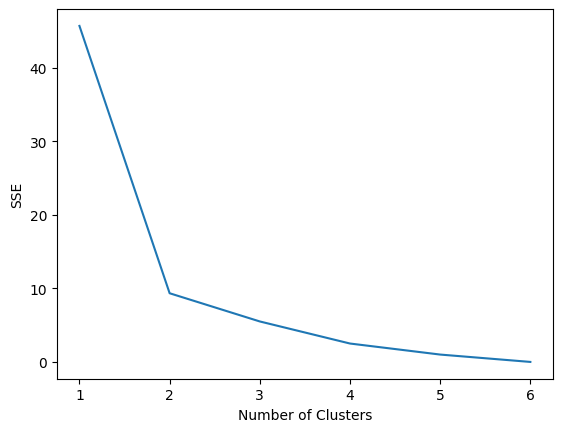

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


numClusters = [1,2,3,4,5,6]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(data)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

**For the given movie rating dataset, the best possible cluster is 2. The method used to decide this is Elbow method. From the plot above we can observe that there is a sharp curve like elbow formed at 2 clusters. Therefore, optimal k value is 2.**

3. On the Vertebrate dataset, we illustrate the results of using three hierarchical clustering algorithms (1) single link (MIN), (2) complete link (MAX), and (3) group average. Given the class label in the original dataset, compute the cophenetic correlation coefficient of the clustering produced by each algorithm. Which clustering algorithm shows the best match with the class labels?

In [7]:
import pandas as pd

data = pd.read_csv("./vertebrate.csv",header='infer')
data

Name  Warm-blooded  Gives Birth  Aquatic Creature  \
0           human             1            1                 0   
1          python             0            0                 0   
2          salmon             0            0                 1   
3           whale             1            1                 1   
4            frog             0            0                 1   
5          komodo             0            0                 0   
6             bat             1            1                 0   
7          pigeon             1            0                 0   
8             cat             1            1                 0   
9   leopard shark             0            1                 1   
10         turtle             0            0                 1   
11        penguin             1            0                 1   
12      porcupine             1            1                 0   
13            eel             0            0                 1   
14     salamander             0            0                 1   

    Aerial Creature  Has Legs  Hibernates       Class  
0                 0         1           0     mammals  
1                 0         0           1    reptiles  
2                 0         0           0      fishes  
3                 0         0           0     mammals  
4                 0         1           1  amphibians  
5                 0         1           0    reptiles  
6                 1         1           1     mammals  
7                 1         1           0       birds  
8                 0         1           0     mammals  
9                 0         0           0      fishes  
10                0         1           0    reptiles  
11                0         1           0       birds  
12                0         1           1     mammals  
13                0         0           0      fishes  
14                0         1           1  amphibians

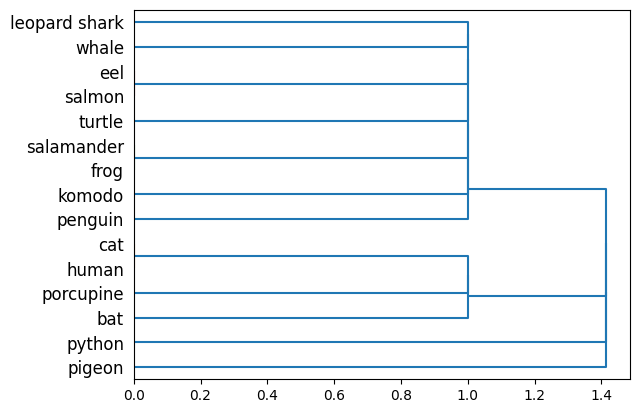

In [8]:
# For single link
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)
Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Above plot is Single Link (MIN)**

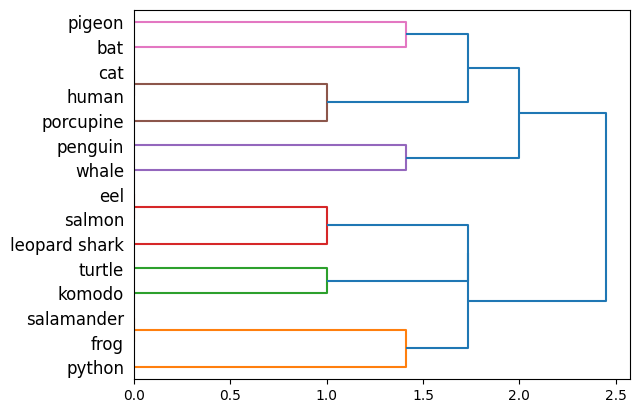

In [9]:
Z = hierarchy.linkage(X.to_numpy(), 'complete')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Above plot is Complete Link (Max)**

In [10]:
Z = hierarchy.linkage(X.to_numpy(), 'average')
dn = hierarchy.dendrogram(Z,labels=names.tolist(),orientation='right')

**Above plot is Group Average**

In [11]:
data[['Name','Class']].sort_values(by='Class')

Name       Class
4            frog  amphibians
14     salamander  amphibians
7          pigeon       birds
11        penguin       birds
2          salmon      fishes
9   leopard shark      fishes
13            eel      fishes
0           human     mammals
3           whale     mammals
6             bat     mammals
8             cat     mammals
12      porcupine     mammals
1          python    reptiles
5          komodo    reptiles
10         turtle    reptiles

**Now computing the cophenetic correlation coefficient of the clustering produced by each algorithm**

In [12]:
from scipy.spatial.distance import pdist

data = pd.read_csv("./vertebrate.csv",header='infer')
data

Yarr = pd.factorize(Y)[0].reshape(-1,1) # converting Y to a numeric ndarray
Ydist = pdist(Yarr,metric='hamming')

from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = data['Name']
Y = data['Class']
X = data.drop(['Name','Class'],axis=1)

data[['Name','Class']].sort_values(by='Class')

from scipy.spatial.distance import pdist, squareform

Z = hierarchy.linkage(X.to_numpy(), 'single')
c, Zdist = hierarchy.cophenet(Z,Ydist); # Computing cophenetic correlation coefficient
Z1 = hierarchy.linkage(X.to_numpy(), 'complete')
c1, Zdist1 = hierarchy.cophenet(Z1,Ydist); # Computing cophenetic correlation coefficient
Z2 = hierarchy.linkage(X.to_numpy(), 'average')
c2, Zdist2 = hierarchy.cophenet(Z2,Ydist); # Computing cophenetic correlation coefficient

print (f"Cophenetic correlation coefficient using Single Link (MIN) is {c}")
print (f"Cophenetic correlation coefficient using Complete Link (MAX)  is {c1}")
print (f"Cophenetic correlation coefficient using Group Average is {c2}")
print (f"The best match will be Complete Link (MAX) algorithm as it achieved highest Cophenetic correlation coefficient")


Cophenetic correlation coefficient using Single Link (MIN) is 0.35580411323343614
Cophenetic correlation coefficient using Complete Link (MAX)  is 0.6063706366458652
Cophenetic correlation coefficient using Group Average is 0.4886522572675798
The best match will be Complete Link (MAX) algorithm as it achieved highest Cophenetic correlation coefficient


4. On the chameleon dataset, how many clusters are produced by DBSCAN when the minimum number of points (min samples) is set to 1, 2, 3, 4, and 5, respectively, while neighborhood radius (eps) is set to a constant value of 15.5. For each instance, copy and paste the plot of the clusters.

<Axes: xlabel='x', ylabel='y'>

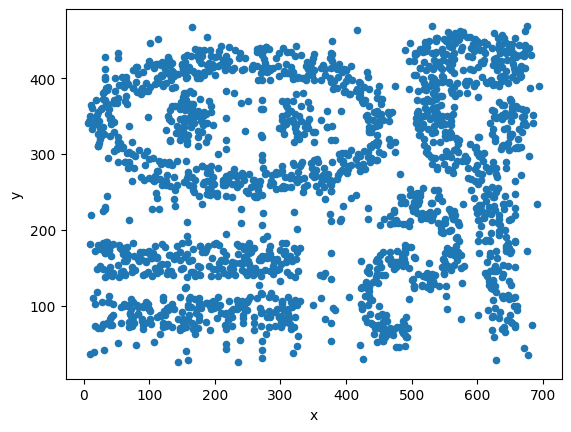

In [13]:
import pandas as pd

data = pd.read_csv("./chameleon.data", delimiter=' ', names=['x','y'])
data.plot.scatter(x='x',y='y')

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=1).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 80


**The above is the plot for min_samples = 1, clusters produced are 80.**

Number of clusters produced: 34


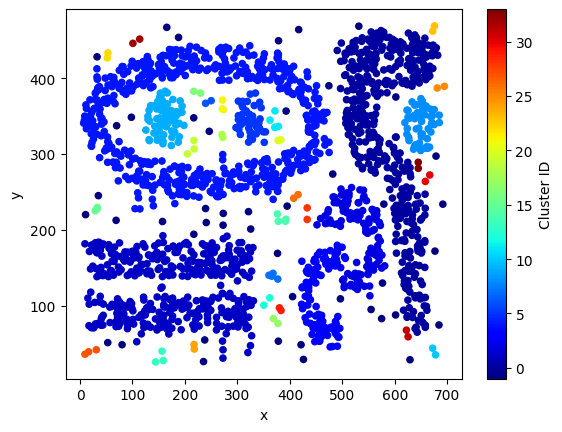

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=2).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

**The above is the plot for min_samples = 2, clusters produced are 34.**

Number of clusters produced: 16


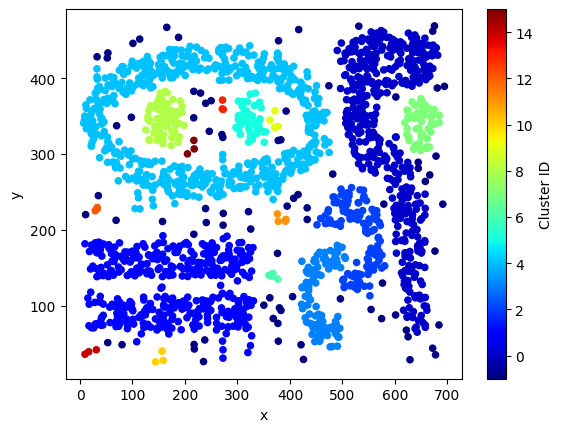

In [16]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=3).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

**The above is the plot for min_samples = 3, clusters produced are 16.**

In [17]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=4).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 11


**The above is the plot for min_samples = 4, clusters produced are 11.**

In [18]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=15.5, min_samples=5).fit(data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = pd.DataFrame(db.labels_,columns=['Cluster ID'])
result = pd.concat((data,labels), axis=1)
result.plot.scatter(x='x',y='y',c='Cluster ID', colormap='jet')
print (f"Number of clusters produced: {labels.max()[0]+1}")

Number of clusters produced: 9


**The above is the plot for min_samples = 5, clusters produced are 9.**

5. For elliptical and 2D data, we applied k-means with k = 2. What happens if we use k = 10 for both these datasets? Copy and paste the clusters formed.

In [19]:
import pandas as pd

data1 = pd.read_csv("./2d_data.txt", delimiter=' ', names=['x','y'])
data2 = pd.read_csv("./elliptical.txt", delimiter=' ', names=['x','y'])

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
data1.plot.scatter(x='x',y='y',ax=ax1)
data2.plot.scatter(x='x',y='y',ax=ax2)

<Axes: xlabel='x', ylabel='y'>

Text(0.5, 1.0, 'K-means Clustering')

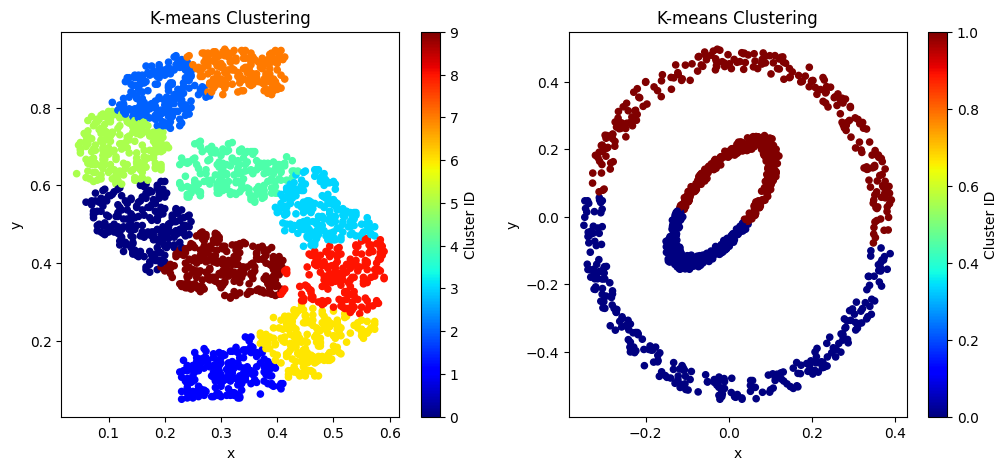

In [20]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10, max_iter=50, random_state=1)
k_means.fit(data1)
labels1 = pd.DataFrame(k_means.labels_,columns=['Cluster ID'])
result1 = pd.concat((data1,labels1), axis=1)

k_means2 = cluster.KMeans(n_clusters=2, max_iter=50, random_state=1)
k_means2.fit(data2)
labels2 = pd.DataFrame(k_means2.labels_,columns=['Cluster ID'])
result2 = pd.concat((data2,labels2), axis=1)

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
result1.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax1)
ax1.set_title('K-means Clustering')
result2.plot.scatter(x='x',y='y',c='Cluster ID',colormap='jet',ax=ax2)
ax2.set_title('K-means Clustering')

**Above are plots which show the clusters when we use k = 10 for both the datasets. It can be observed that clusters formed for both 2-D and elliptical data. The 2-D data has 10 clusters and Elliptical data has 2 clusters.**

### Problem 2

The files for this problem are under Experiment 2 folder. Datasets to be used for experimentation are : `samsung test labels`, `samsung train labels`, `samsung train`, `samsung test`. Jupyter notebook: `pca and clustering.ipynb`. The data comes from the accelerometers and gyros of Samsung Galaxy S3 mobile phones (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones).


In this data, the type of activity a person was performing with a phone in their pocket is also known - whether they were walking, standing, lying down, sitting, walking up or walking down the stairs. Answer the following questions:
1. Let us look at the correspondence between the cluster labels and the original activity class labels. We see that each cluster has points coming from multiple classes, and is thus impure. Let's look at the maximum percentage of points in a cluster that are coming from a single class, which we can call as the 'purity' metric. For example, if a cluster consisting of 300 points has the following distribution of class labels:

* class 1 - 200
* class 3 - 50
* class 6 - 50

then the purity metric for this cluster will be 200/300, which is approximately 0.67. A higher value of this metric for a cluster signifies higher purity of the cluster. Compute this metric for all of the 6 clusters produced by running Kmeans with K = 6 on the given dataset. What is the maximum purity metric across all 6 clusters?

In [21]:
import os
import numpy as np
X_train = np.loadtxt(os.path.join("./samsung_train.txt"))
y_train = np.loadtxt(os.path.join("./samsung_train_labels.txt")).astype(int)

X_test = np.loadtxt(os.path.join("./samsung_test.txt"))
y_test = np.loadtxt(os.path.join("./samsung_test_labels.txt")).astype(int)

In [22]:
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])
n_classes = np.unique(y).size
print (f"Number of classes are {n_classes}")

Number of classes are 6


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(10299, 561)

(10299, 65)

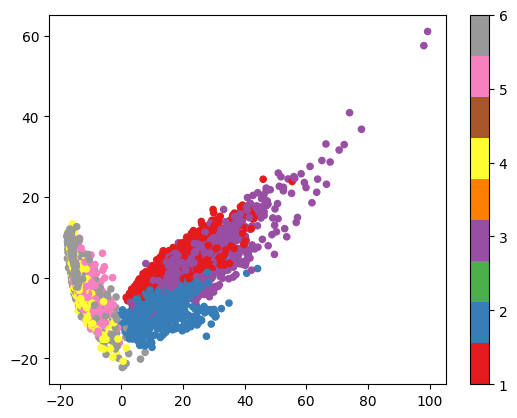

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=0.9, random_state=10).fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, s=20, cmap='Set1');
plt.colorbar()
X_pca.shape

In [25]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6, n_init=100, 
                random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

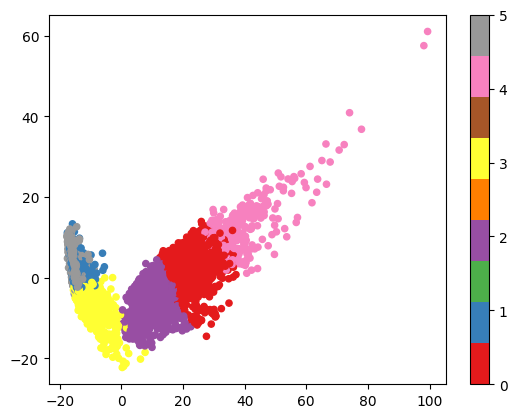

In [26]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, s=20,cmap='Set1');
plt.colorbar()

In [27]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(6)] + ['all']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
walking                     741         0       903         0        78   
going up the stairs         296         0      1241         2         5   
going down the stairs       890         0       320         0       196   
sitting                       0      1235         1       450         0   
standing                      0      1344         0       562         0   
lying                         0        52         5       329         0   
all                        1927      2631      2470      1343       279   

                       cluster6    all  
walking                       0   1722  
going up the stairs           0   1544  
going down the stairs         0   1406  
sitting                      91   1777  
standing                      0   1906  
lying                      1558   1944  
all                        1649  10299

In [28]:
newTab = tab[:-1]
newTab = newTab.iloc[:, :-1]
newTab
maxNums = newTab.max()
sumNums = newTab.sum()
result = [x/y for x,y in zip(maxNums,sumNums)]
print("The purity measures achieved for all the 10 clusters are:")
print(result)
print(f"Maximum Purity across all clusters is {max(result)}")

The purity measures achieved for all the 10 clusters are:
[0.4618578100674624, 0.5108323831242874, 0.5024291497975708, 0.4184661206254654, 0.7025089605734767, 0.944815039417829]
Maximum Purity across all clusters is 0.944815039417829


**Maximum Purity across all clusters is 0.944815039417829**

2. What is the maximum purity metric for any cluster if we run Kmeans with K = 10 on the same dataset? Explain the rise/fall in purity as we increase K from 6 to 10.

In [29]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, n_init=100, random_state=10)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

In [30]:
import pandas as pd

tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['walking', 'going up the stairs', 'going down the stairs', 'sitting', 'standing', 'lying', 'all']
tab.columns = ['cluster' + str(i + 1) for i in range(10)] + ['all']
tab

cluster1  cluster2  cluster3  cluster4  cluster5  \
walking                       0        11       141         0       918   
going up the stairs           0         0        63         0       153   
going down the stairs         0        79       644         0       318   
sitting                      88         0         0        70         0   
standing                     32         0         0         0         0   
lying                       158         0         0      1592         0   
all                         278        90       848      1662      1389   

                       cluster6  cluster7  cluster8  cluster9  cluster10  \
walking                     378         0       195         0         79   
going up the stairs        1018         0        17         0        293   
going down the stairs       196         0       152         0         17   
sitting                       1      1043         0       575          0   
standing                      0       953         0       921          0   
lying                         2        47         0       145          0   
all                        1595      2043       364      1641        389   

                         all  
walking                 1722  
going up the stairs     1544  
going down the stairs   1406  
sitting                 1777  
standing                1906  
lying                   1944  
all                    10299

In [31]:
newTab = tab[:-1]
newTab = newTab.iloc[:, :-1]
newTab
maxNums = newTab.max()

sumNums = newTab.sum()
result = [x/y for x,y in zip(maxNums,sumNums)]
print("The purity measures achieved for all the 10 clusters are:")
print(result)
print(f"Maximum Purity across all clusters with k = 10 is {max(result)}")

The purity measures achieved for all the 10 clusters are:
[0.5683453237410072, 0.8777777777777778, 0.7594339622641509, 0.9578820697954272, 0.6609071274298056, 0.6382445141065831, 0.5105237395986295, 0.5357142857142857, 0.5612431444241316, 0.7532133676092545]
Maximum Purity across all clusters with k = 10 is 0.9578820697954272


**When k = 6 the maximum purity was 0.944815039417829 and when we change to k = 10 the maximum putiry has increased to 0.9578820697954272. This shows that as k is increased the maximum purity also increases due to change in number of clusters.**

### Problem 3

The files for this problem are under Experiment 3 folder. Jupyter notebook: `covid-19research-challenge.ipynb`. In this experiment, we will be looking at the problem of clustering real-world research articles related to COVID-19. Dataset Download URL: https:// drive.google.com/file/d/1IC0s9QoBLWFN9tRI-z2QbJJWgngfAm8w/view?usp=sharing (Filename: CORD-19-research-challenge.zip, File size: 1.58 GB). Please download and unzip this file in the Experiment 3 folder before running the Python notebook for this problem. Dataset Description: In response to the COVID-19 pandemic, the White House and a coalition of leading research groups have prepared the COVID-19 Open Research Dataset (CORD-19). CORD-19 is a resource of over 29,000 scholarly articles, including over 13,000 with full text, about COVID-19, SARS-CoV-2, and related coronaviruses. This freely available dataset is provided to the global research community to apply recent advances in natural language processing and other AI techniques to generate new insights in support of the ongoing fight against this infectious disease. There is a growing urgency for these approaches because of the rapid acceleration in modern coronavirus literature, making it difficult for the medical research community to keep up. Answer the following questions.

1. After handling duplicates, what is the count, mean, standard deviation minimum, and maximum values for the abstract word count and body word count?

In [32]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [33]:
root_path = r"/Users/pranav/Documents/Spring 2023/DA/Project/Project2/CORD-19-research-challenge"
metadata_path = f'{root_path}/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={'pubmed_id': str,'Microsoft Academic Paper ID': str, 'doi': str})
meta_df.head()

cord_uid                                       sha source_x  \
0  xqhn0vbp  1e1286db212100993d03cc22374b624f7caee956      PMC   
1  gi6uaa83  8ae137c8da1607b3a8e4c946c07ca8bda67f88ac      PMC   
2  le0ogx1s                                       NaN      PMC   
3  fy4w7xz8  0104f6ceccf92ae8567a0102f89cbb976969a774      PMC   
4  0qaoam29  5b68a553a7cbbea13472721cd1ad617d42b40c26      PMC   

                                               title                      doi  \
0  Airborne rhinovirus detection and effect of ul...    10.1186/1471-2458-3-5   
1    Discovering human history from stomach bacteria  10.1186/gb-2003-4-5-213   
2     A new recruit for the army of the men of death  10.1186/gb-2003-4-7-113   
3  Association of HLA class I with severe acute r...    10.1186/1471-2350-4-9   
4   A double epidemic model for the SARS propagation   10.1186/1471-2334-3-19   

       pmcid pubmed_id license  \
0  PMC140314  12525263   no-cc   
1  PMC156578  12734001   no-cc   
2  PMC193621  12844350   no-cc   
3  PMC212558  12969506   no-cc   
4  PMC222908  12964944   no-cc   

                                            abstract publish_time  \
0  BACKGROUND: Rhinovirus, the most common cause ...   2003-01-13   
1  Recent analyses of human pathogens have reveal...   2003-04-28   
2  The army of the men of death, in John Bunyan's...   2003-06-27   
3  BACKGROUND: The human leukocyte antigen (HLA) ...   2003-09-12   
4  BACKGROUND: An epidemic of a Severe Acute Resp...   2003-09-10   

                                             authors            journal  \
0  Myatt, Theodore A; Johnston, Sebastian L; Rudn...  BMC Public Health   
1                                   Disotell, Todd R        Genome Biol   
2                                  Petsko, Gregory A        Genome Biol   
3  Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...      BMC Med Genet   
4  Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine     BMC Infect Dis   

  Microsoft Academic Paper ID WHO #Covidence  has_pdf_parse  \
0                         NaN            NaN           True   
1                         NaN            NaN           True   
2                         NaN            NaN          False   
3                         NaN            NaN           True   
4                         NaN            NaN           True   

   has_pmc_xml_parse  full_text_file  \
0               True  custom_license   
1               True  custom_license   
2               True  custom_license   
3               True  custom_license   
4               True  custom_license   

                                                 url  
0  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
1  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
2  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...  
3  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...  
4  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...

In [34]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

59311

In [35]:
#helper functions
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
    
# Helper function adds break after every words when character length reach to certain amount. This is for the interactive plot so that hover tool fits the screen.
    
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [36]:
#Loading data into dataframe

dict_ = {'paper_id': [], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    try:
        if idx % (len(all_json) // 10) == 0:
            print(f'Processing index: {idx} of {len(all_json)}')
        content = FileReader(entry)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
        # no metadata, skip this paper
        if len(meta_data) == 0:
            continue

        dict_['paper_id'].append(content.paper_id)
        dict_['abstract'].append(content.abstract)
        dict_['body_text'].append(content.body_text)

        # also create a column for the summary of abstract to be used in a plot
        if len(content.abstract) == 0: 
            # no abstract provided
            dict_['abstract_summary'].append("Not provided.")
        elif len(content.abstract.split(' ')) > 100:
            # abstract provided is too long for plot, take first 300 words append with ...
            info = content.abstract.split(' ')[:100]
            summary = get_breaks(' '.join(info), 40)
            dict_['abstract_summary'].append(summary + "...")
        else:
            # abstract is short enough
            summary = get_breaks(content.abstract, 40)
            dict_['abstract_summary'].append(summary)

        # get metadata information
        meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]

        try:
            # if more than one author
            authors = meta_data['authors'].values[0].split(';')
            if len(authors) > 2:
                # more than 2 authors, may be problem when plotting, so take first 2 append with ...
                dict_['authors'].append(". ".join(authors[:2]) + "...")
            else:
                # authors will fit in plot
                dict_['authors'].append(". ".join(authors))
        except Exception as e:
            # if only one author - or Null valie
            dict_['authors'].append(meta_data['authors'].values[0])

        # add the title information, add breaks when needed
        try:
            title = get_breaks(meta_data['title'].values[0], 40)
            dict_['title'].append(title)
        # if title was not provided
        except Exception as e:
            dict_['title'].append(meta_data['title'].values[0])

        # add the journal information
        dict_['journal'].append(meta_data['journal'].values[0])
        
    
    except Exception as e:
        continue
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 59311
Processing index: 5931 of 59311
Processing index: 11862 of 59311
Processing index: 17793 of 59311
Processing index: 23724 of 59311
Processing index: 29655 of 59311
Processing index: 35586 of 59311
Processing index: 41517 of 59311
Processing index: 47448 of 59311
Processing index: 53379 of 59311
Processing index: 59310 of 59311


paper_id  \
0  4ed70c27f14b7f9e6219fe605eae2b21a229f23c   
1  306ef95a3a91e13a93bcc37fb2c509b67c0b5640   
2  ab680d5dbc4f51252da3473109a7885dd6b5eb6f   
3  6599ebbef3d868afac9daa4f80fa075675cf03bc   
4  eb5c7f3ff921ad6469b79cc8a3c122648204ece4   

                                            abstract  \
0                                                      
1  Thousands of people in the United States have ...   
2                                                      
3  International aviation is growing rapidly, res...   
4                                                      

                                           body_text  \
0  The Middle East respiratory syndrome coronavir...   
1  The 2019 novel coronavirus (SARS-CoV-2), ident...   
2  The evolutionary history of humans is characte...   
3  Sixty years ago, civil aviation was an infant ...   
4  Acute infections of the gastrointestinal tract...   

                                   authors  \
0   Al-Tawfiq, Jaffar A..  Memish, Ziad A.   
1  Bryson-Cahn, Chloe.  Duchin, Jeffrey...   
2                           Scarpino, S.V.   
3      Macintosh, Andrew.  Wallace, Lailey   
4              Booth, I.W..  McNeish, A.S.   

                                               title  \
0   Update on therapeutic options for Middle East...   
1   A Novel Approach for a Novel Pathogen: using ...   
2   Evolutionary Medicine IV. Evolution and<br>Em...   
3   International aviation emissions to 2025: Can...   
4                            Mechanisms of diarrhoea   

                                 journal  \
0            Expert Rev Anti Infect Ther   
1                        Clin Infect Dis   
2   Encyclopedia of Evolutionary Biology   
3                          Energy Policy   
4  Baillière's Clinical Gastroenterology   

                                    abstract_summary  
0                                      Not provided.  
1   Thousands of people in the United States have...  
2                                      Not provided.  
3   International aviation is growing rapidly,<br...  
4                                      Not provided.

In [37]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))
df_covid.head()

paper_id  \
0  4ed70c27f14b7f9e6219fe605eae2b21a229f23c   
1  306ef95a3a91e13a93bcc37fb2c509b67c0b5640   
2  ab680d5dbc4f51252da3473109a7885dd6b5eb6f   
3  6599ebbef3d868afac9daa4f80fa075675cf03bc   
4  eb5c7f3ff921ad6469b79cc8a3c122648204ece4   

                                            abstract  \
0                                                      
1  Thousands of people in the United States have ...   
2                                                      
3  International aviation is growing rapidly, res...   
4                                                      

                                           body_text  \
0  The Middle East respiratory syndrome coronavir...   
1  The 2019 novel coronavirus (SARS-CoV-2), ident...   
2  The evolutionary history of humans is characte...   
3  Sixty years ago, civil aviation was an infant ...   
4  Acute infections of the gastrointestinal tract...   

                                   authors  \
0   Al-Tawfiq, Jaffar A..  Memish, Ziad A.   
1  Bryson-Cahn, Chloe.  Duchin, Jeffrey...   
2                           Scarpino, S.V.   
3      Macintosh, Andrew.  Wallace, Lailey   
4              Booth, I.W..  McNeish, A.S.   

                                               title  \
0   Update on therapeutic options for Middle East...   
1   A Novel Approach for a Novel Pathogen: using ...   
2   Evolutionary Medicine IV. Evolution and<br>Em...   
3   International aviation emissions to 2025: Can...   
4                            Mechanisms of diarrhoea   

                                 journal  \
0            Expert Rev Anti Infect Ther   
1                        Clin Infect Dis   
2   Encyclopedia of Evolutionary Biology   
3                          Energy Policy   
4  Baillière's Clinical Gastroenterology   

                                    abstract_summary  abstract_word_count  \
0                                      Not provided.                    0   
1   Thousands of people in the United States have...                   50   
2                                      Not provided.                    0   
3   International aviation is growing rapidly,<br...                  140   
4                                      Not provided.                    0   

   body_word_count  
0             2748  
1              944  
2             2884  
3             5838  
4             6972

In [38]:
# Removing possible duplicates

df_covid.dropna(inplace=True)
df_covid = df_covid[df_covid.abstract != ''] #Remove rows which are missing abstracts
df_covid = df_covid[df_covid.body_text != ''] #Remove rows which are missing body_text
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True) # remove duplicate rows having same abstract and body_text
df_covid.describe(include='all')

paper_id  \
count                                      24584   
unique                                     24584   
top     306ef95a3a91e13a93bcc37fb2c509b67c0b5640   
freq                                           1   
mean                                         NaN   
std                                          NaN   
min                                          NaN   
25%                                          NaN   
50%                                          NaN   
75%                                          NaN   
max                                          NaN   

                                                 abstract  \
count                                               24584   
unique                                              24552   
top     Travel Medicine and Infectious Disease xxx (xx...   
freq                                                    5   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                body_text  \
count                                               24584   
unique                                              24584   
top     The 2019 novel coronavirus (SARS-CoV-2), ident...   
freq                                                    1   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                        authors                    title  \
count                                     24584                    24584   
unique                                    23709                    24545   
top     Mizutani, Tetsuya.  Fukushi, Shuetsu...   Respiratory Infections   
freq                                          7                        3   
mean                                        NaN                      NaN   
std                                         NaN                      NaN   
min                                         NaN                      NaN   
25%                                         NaN                      NaN   
50%                                         NaN                      NaN   
75%                                         NaN                      NaN   
max                                         NaN                      NaN   

         journal                                   abstract_summary  \
count      24584                                              24584   
unique      3962                                              24545   
top     PLoS One   Travel Medicine and Infectious Disease xxx<br...   
freq        1514                                                  5   
mean         NaN                                                NaN   
std          NaN                                                NaN   
min          NaN                                                NaN   
25%          NaN                                                NaN   
50%          NaN                                                NaN   
75%          NaN                                                NaN   
max          NaN                                                NaN   

        abstract_word_count  body_word_count  
count          24584.000000     24584.000000  
unique                  NaN              NaN  
top                     NaN              N

1. After handling duplicates, what is the count, mean, standard deviation minimum, and maximum values for the abstract word count and body word count?

In [39]:
df_covid['abstract_word_count'].describe()

count    24584.000000
mean       216.446673
std        137.065117
min          1.000000
25%        147.000000
50%        200.000000
75%        255.000000
max       3694.000000
Name: abstract_word_count, dtype: float64

In [40]:
df_covid['body_word_count'].describe()

count     24584.000000
mean       4435.475106
std        3657.421423
min          23.000000
25%        2711.000000
50%        3809.500000
75%        5431.000000
max      232431.000000
Name: body_word_count, dtype: float64

**The count, mean, standard deviation, minimum, and maximum values for the abstract word count and body word count after handling duplicates are shown above.**

In [41]:
df_covid = df_covid.head(12500)

In [42]:
# remove punctuaton

import re

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: re.sub('[^a-zA-z0-9\s]','',x))

In [43]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

In [44]:
df_covid.head(4)

paper_id  \
1  306ef95a3a91e13a93bcc37fb2c509b67c0b5640   
3  6599ebbef3d868afac9daa4f80fa075675cf03bc   
5  44290ff75bad8ffaf5d3028420739ce7b08dc2a9   
7  3c395c76b3d97ab269aed5e6c02d0f0184df7f9f   

                                            abstract  \
1  thousands of people in the united states have ...   
3  international aviation is growing rapidly resu...   
5  ev71 causes serious diseases in humans the aim...   
7  for analyzing the changes in immunoglobulins h...   

                                           body_text  \
1  the 2019 novel coronavirus sarscov2 identified...   
3  sixty years ago civil aviation was an infant i...   
5  enteroviruses are members of the family picorn...   
7  a world health organization who [1] alert in l...   

                                   authors  \
1  Bryson-Cahn, Chloe.  Duchin, Jeffrey...   
3      Macintosh, Andrew.  Wallace, Lailey   
5       Hung, Hui-Chen.  Chen, Tzu-Chun...   
7        Aydin, Suleyman.  Guven, Tumer...   

                                               title                 journal  \
1   A Novel Approach for a Novel Pathogen: using ...         Clin Infect Dis   
3   International aviation emissions to 2025: Can...           Energy Policy   
5   Inhibition of enterovirus 71 replication and<...  J Antimicrob Chemother   
7   The effects of fever on hormone ghrelins,<br>...               Endocrine   

                                    abstract_summary  abstract_word_count  \
1   Thousands of people in the United States have...                   50   
3   International aviation is growing rapidly,<br...                  140   
5   EV71) causes serious diseases in humans. The<...                  258   
7   For analyzing the changes in immunoglobulins,...                  153   

   body_word_count  
1              944  
3             5838  
5             3121  
7             2731

In [45]:
text = df_covid.drop(["paper_id", "abstract", "abstract_word_count", "body_word_count", "authors", "title", "journal", "abstract_summary"], axis=1)

In [46]:
text.head(5)

body_text
1  the 2019 novel coronavirus sarscov2 identified...
3  sixty years ago civil aviation was an infant i...
5  enteroviruses are members of the family picorn...
7  a world health organization who [1] alert in l...
9  diagnosis of viral infections of the respirato...

In [47]:
text_arr = text.stack().tolist()
len(text_arr)

12500

2. Given the following word list: ['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause'], what is its corresponding list of 2-grams ?

In [48]:
n_gram_all = []
words=[['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause']]
for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [49]:
n_gram_all

[['the2019',
  '2019novel',
  'novelcoronavirus',
  'coronavirussarscov2',
  'sarscov2identified',
  'identifiedas',
  'asthe',
  'thecause']]

**The above is the list of 2-grams which is correspondent to the given word list.**

In [50]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [51]:
X.shape

(1, 4096)

3. When we applied k-means clustering with K = 10 on the data created using HashingVectorizer features from 2-grams, we could see that some clusters still had some overlap in the t-SNE plot. Can you improve this by changing the number of clusters? What value of K visually leads to good separation among the clusters in the t-SNE plot? Copy and paste the corresponding t-SNE plot.

In [52]:
words = []
for ii in range(0,len(text)):
    words.append(str(text.iloc[ii]['body_text']).split(" "))

In [53]:
n_gram_all = []
for word in words:
    # get n-grams for the instance
    n_gram = []
    for i in range(len(word)-2+1):
        n_gram.append("".join(word[i:i+2]))
    n_gram_all.append(n_gram)

In [54]:
print(words[0][:20])

['the', '2019', 'novel', 'coronavirus', 'sarscov2', 'identified', 'as', 'the', 'cause', 'of', 'an', 'outbreak', 'of', 'respiratory', 'infection', 'in', 'wuhan', 'china', 'is', 'rapidly']


In [55]:
from sklearn.feature_extraction.text import HashingVectorizer

# hash vectorizer instance
hvec = HashingVectorizer(lowercase=False, analyzer=lambda l:l, n_features=2**12)

# features matrix X
X = hvec.fit_transform(n_gram_all)

In [56]:
X.shape

(12500, 4096)

In [57]:
from sklearn.cluster import MiniBatchKMeans
import seaborn as sns
k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [58]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=5)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 12500 samples in 0.010s...
[t-SNE] Computed neighbors for 12500 samples in 14.044s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12500
[t-SNE] Computed conditional probabilities for sample 2000 / 12500
[t-SNE] Computed conditional probabilities for sample 3000 / 12500
[t-SNE] Computed conditional probabilities for sample 4000 / 12500
[t-SNE] Computed conditional probabilities for sample 5000 / 12500
[t-SNE] Computed conditional probabilities for sample 6000 / 12500
[t-SNE] Computed conditional probabilities for sample 7000 / 12500
[t-SNE] Computed conditional probabilities for sample 8000 / 12500
[t-SNE] Computed conditional probabilities for sample 9000 / 12500
[t-SNE] Computed conditional probabilities for sample 10000 / 12500
[t-SNE] Computed conditional probabilities for sample 11000 / 12500
[t-SNE] Computed conditional probabilities for sample 12000 / 12500
[t-SNE] Computed conditional probabilities for sa

In [59]:
X_embedded

array([[ 25.285242, -62.144165],
       [  8.16396 ,  32.19288 ],
       [-26.632418,  28.4503  ],
       ...,
       [ 10.605549,  10.158927],
       [ 14.921751,  50.87661 ],
       [-39.214436,  14.401214]], dtype=float32)

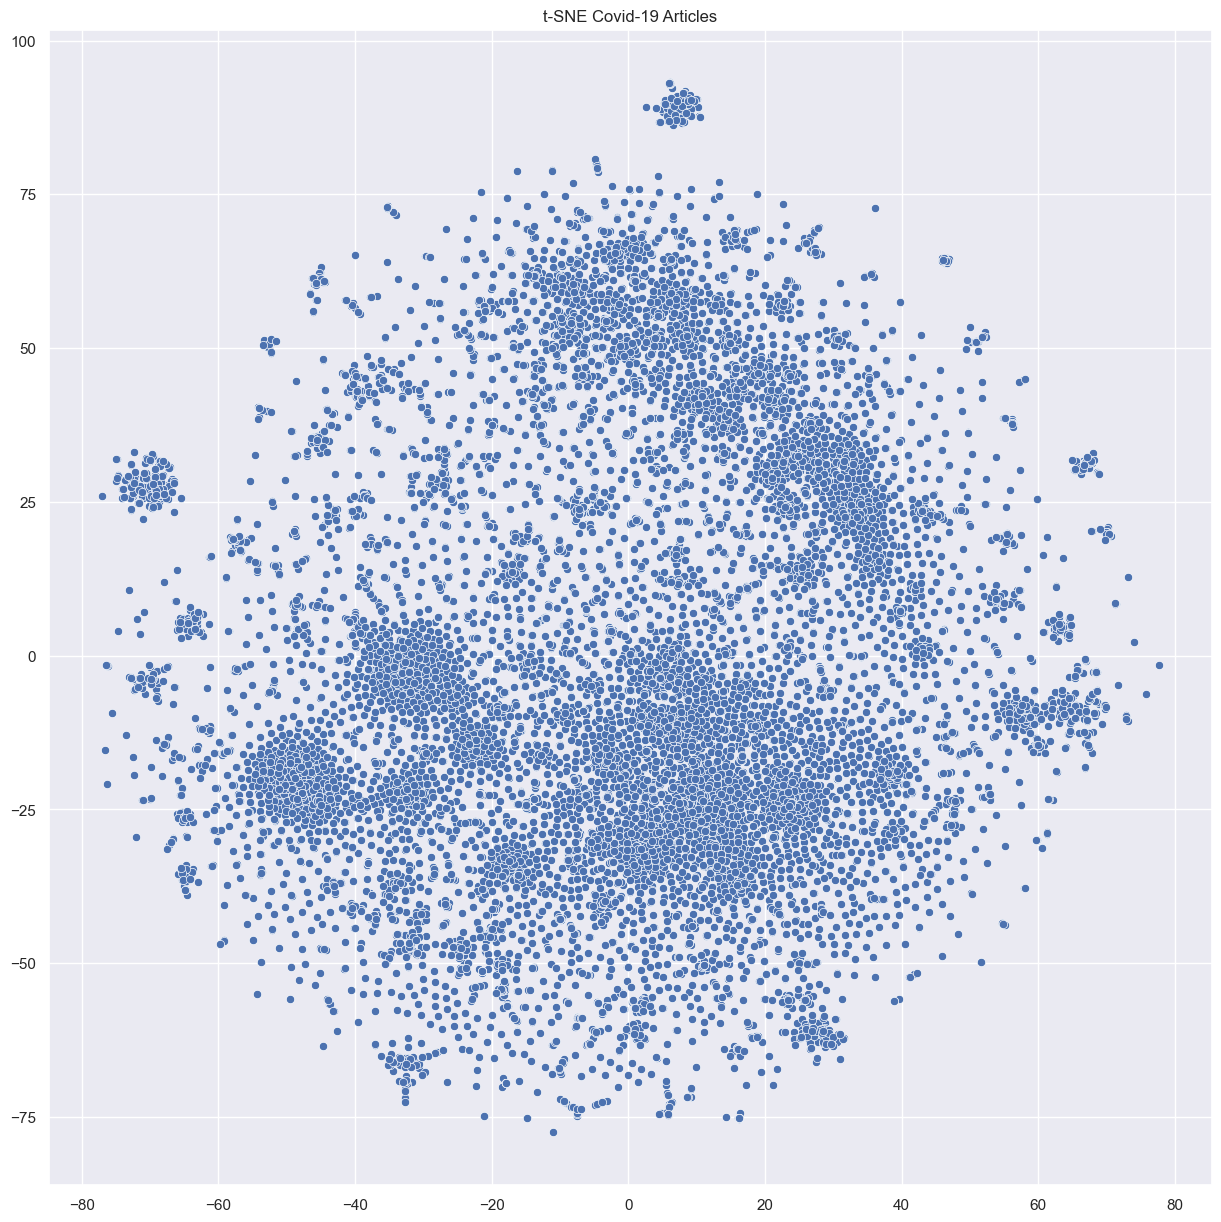

In [60]:
from matplotlib import pyplot as plt
import seaborn as sns
# sns settings
sns.set(rc={'figure.figsize':(15,15)})
# colors
palette = sns.color_palette("bright", 1)
# plot
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1], palette=palette)
plt.title("t-SNE Covid-19 Articles")
plt.show()

**Above is the plot for k = 10**

In [61]:
from sklearn.cluster import MiniBatchKMeans

k = 8
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

**Here the k is changed to 8.**

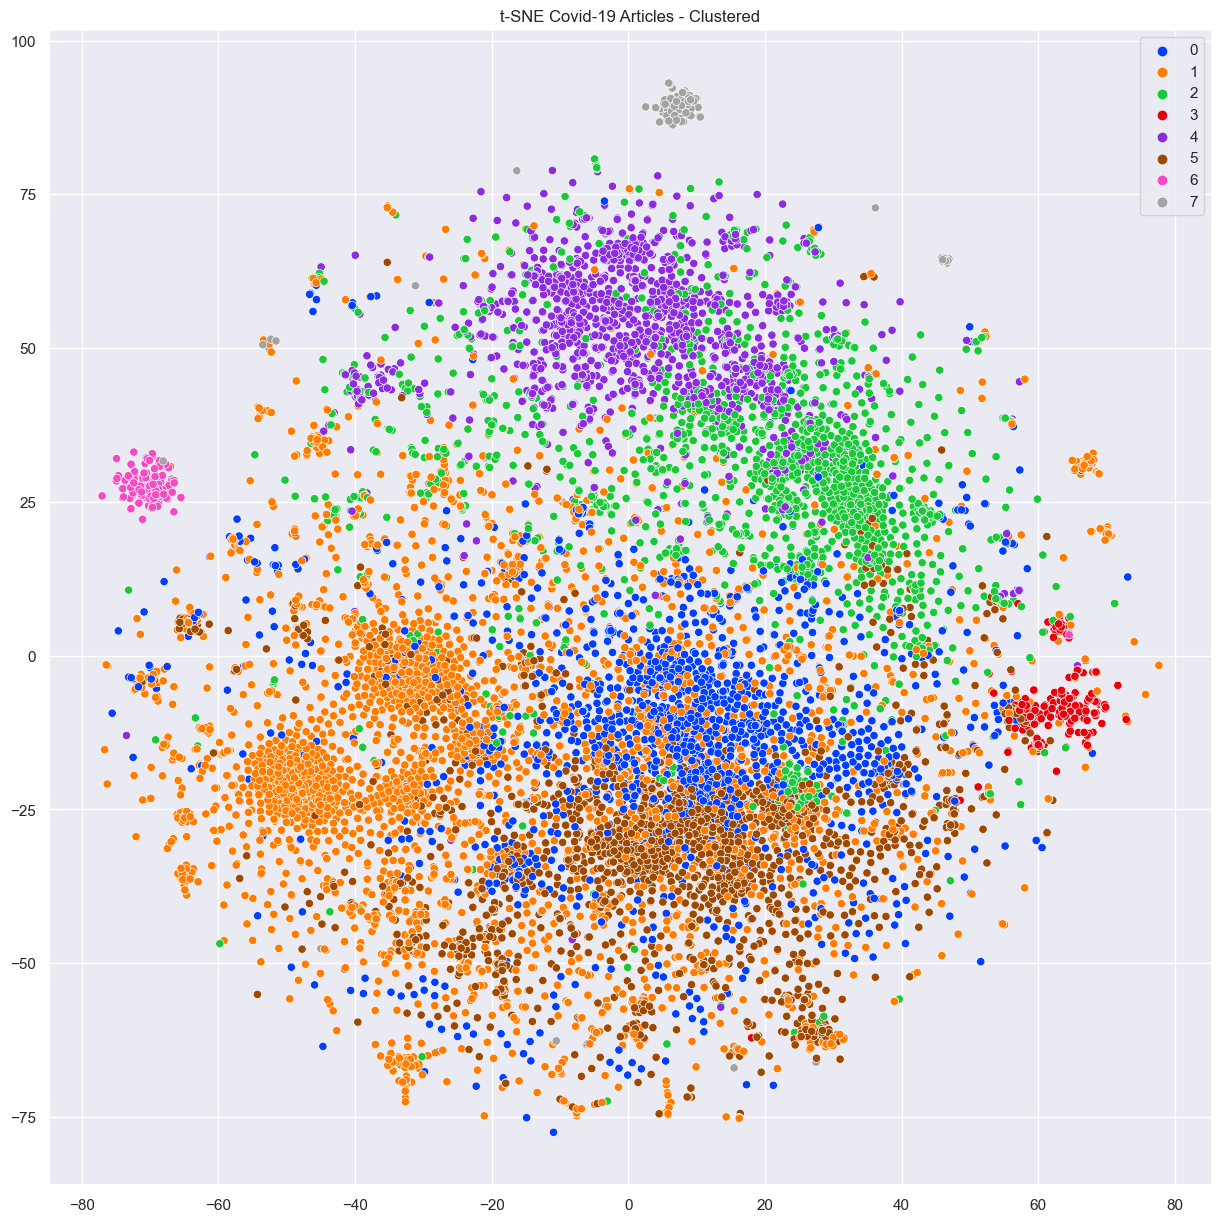

In [62]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})
# colors
palette = sns.color_palette("bright", len(set(y_pred)))
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

**Above is the plot for k = 8**

In [63]:
from sklearn.cluster import MiniBatchKMeans

k = 12
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

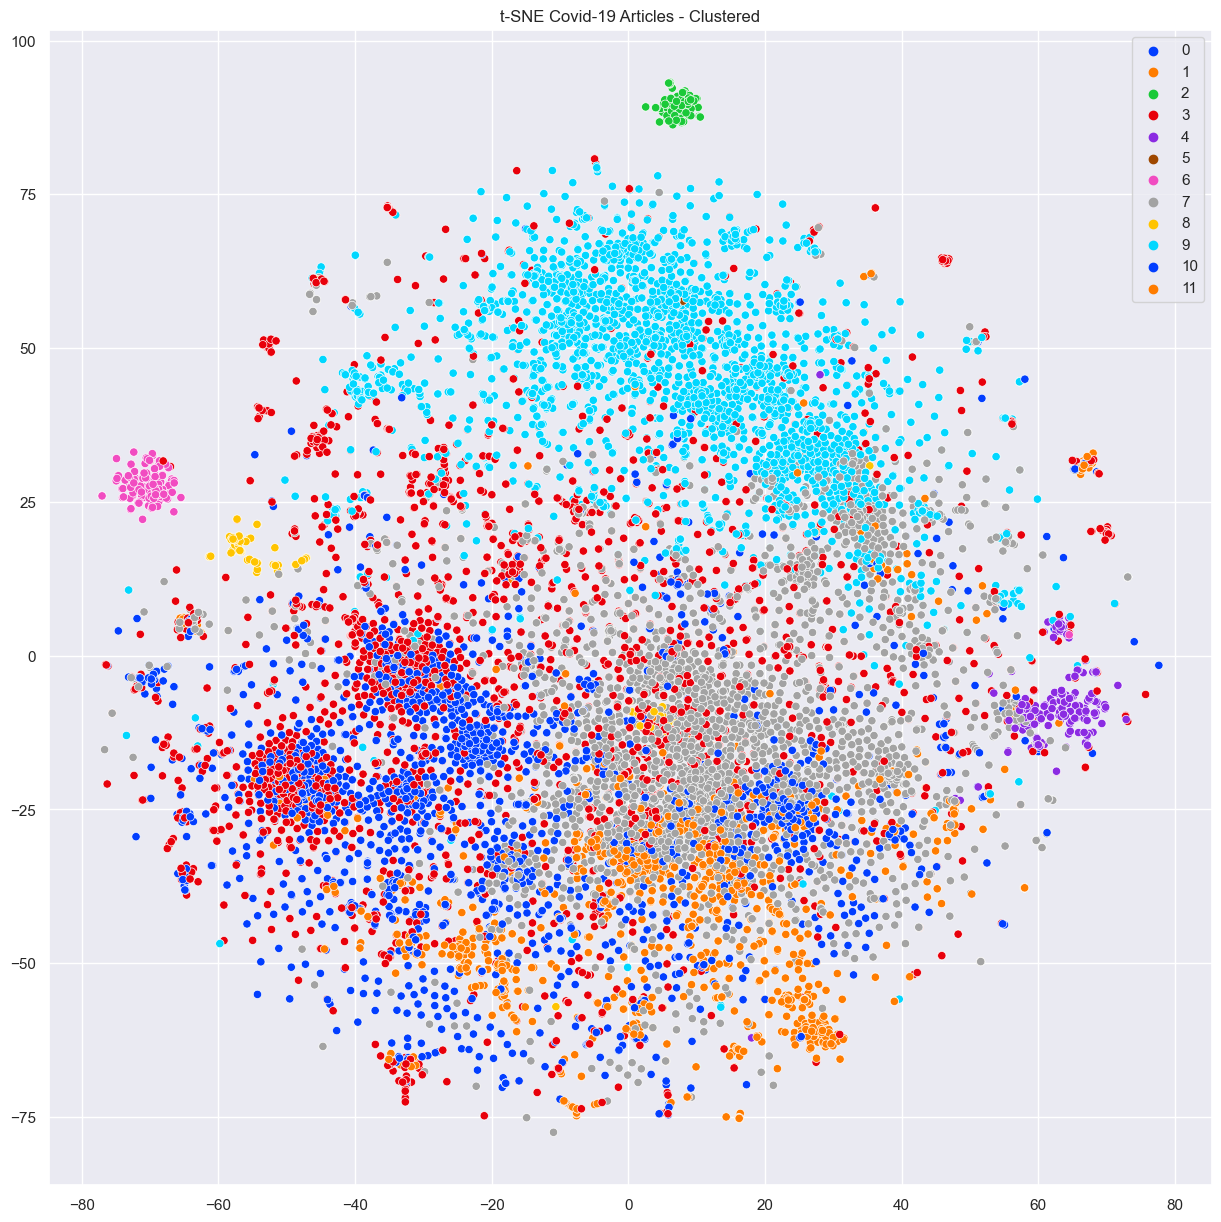

In [64]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})
# colors
palette = sns.color_palette("bright", len(set(y_pred)))
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered")
plt.show()

**Above is the t-SNE plot with k=12**

**From observing the plots with multiple k values it can be observed that k = 10 is good option, but when we increase k to 12 it avoids overlapping which will make it a better option.**

4. By using tf-idf vectorizer and plain text features instead of 2-grams, we could see that the clusters obtained from K-means clustering (with K = 10) are more separable in the t-SNE plot. What happens when we apply the tf-idf vectorizer on the 2-gram representation of documents instead of plain text, and then apply K-means clustering with K = 10? Copy and paste the corresponding t-SNE plot.

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
vectorizer = TfidfVectorizer(max_features=2**12, lowercase=False, analyzer=lambda l:l)
X_tfidf = vectorizer.fit_transform(n_gram_all)

In [66]:
from sklearn.cluster import MiniBatchKMeans
k = 10
kmeans = MiniBatchKMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X_tfidf)

In [67]:
y = y_pred
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)
X_embedded = tsne.fit_transform(X_tfidf.toarray())

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 12500 samples in 0.010s...
[t-SNE] Computed neighbors for 12500 samples in 15.288s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12500
[t-SNE] Computed conditional probabilities for sample 2000 / 12500
[t-SNE] Computed conditional probabilities for sample 3000 / 12500
[t-SNE] Computed conditional probabilities for sample 4000 / 12500
[t-SNE] Computed conditional probabilities for sample 5000 / 12500
[t-SNE] Computed conditional probabilities for sample 6000 / 12500
[t-SNE] Computed conditional probabilities for sample 7000 / 12500
[t-SNE] Computed conditional probabilities for sample 8000 / 12500
[t-SNE] Computed conditional probabilities for sample 9000 / 12500
[t-SNE] Computed conditional probabilities for sample 10000 / 12500
[t-SNE] Computed conditional probabilities for sample 11000 / 12500
[t-SNE] Computed conditional probabilities for sample 12000 / 12500
[t-SNE] Computed conditional probabilities for sa

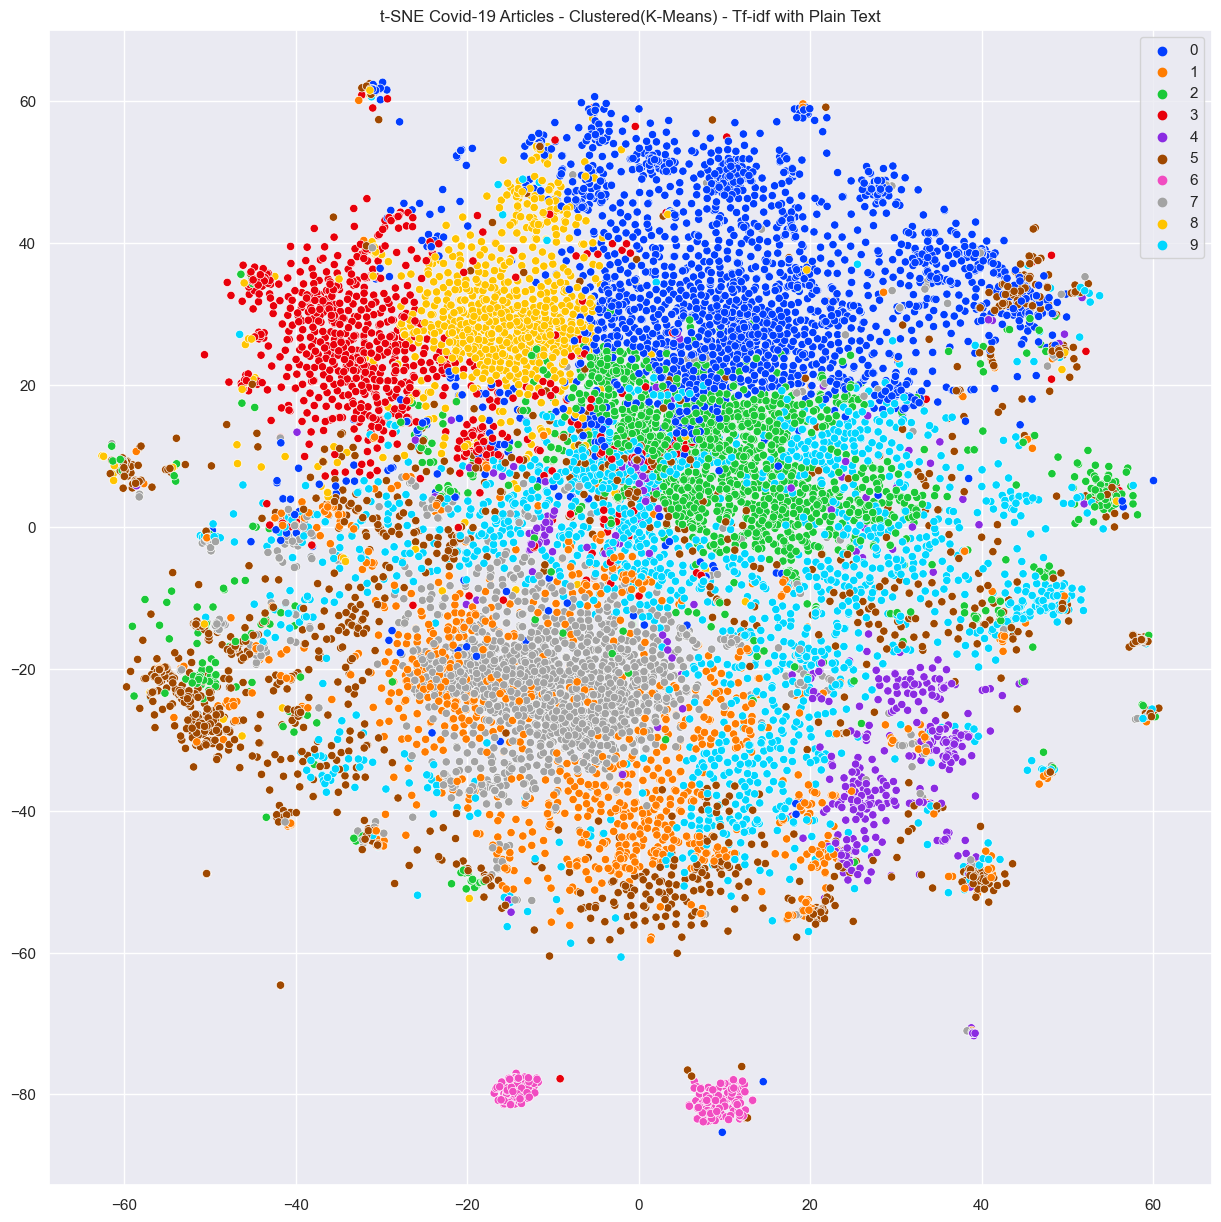

In [68]:
from matplotlib import pyplot as plt
import seaborn as sns
# sns settings
sns.set(rc={'figure.figsize':(15,15)})
# colors
palette = sns.color_palette("bright", len(set(y)))
# plot
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=y, legend='full', palette=palette)
plt.title("t-SNE Covid-19 Articles - Clustered(K-Means) - Tf-idf with Plain Text")
plt.show()

**Above is the t-SNE plot for 2-gram representation of documents and k-means clustering with k=10.**